In [878]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns


# COLLECTION & WRANGLING

In [879]:
df = pd.read_csv(r"stroke_data.csv",
                header= 0)
rows_before_cleaning = df.shape[0]

print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [880]:
# Stick with one index
df.drop(["id"], axis= 1, inplace= True)

df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Missing values and duplicates 

In [881]:
# dropping duplicates
df.drop_duplicates(inplace=True)

# missing values count
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [882]:
# dropping missing values
df.dropna(axis= 0, inplace= True)
result= 100 - (df.shape[0] / rows_before_cleaning * 100)

print(f"total percentage of data lost: {result}%")

total percentage of data lost: 3.933463796477497%


## Formatting

In [883]:
#Checking Unique values in each categorical column
cats = ['gender', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'smoking_status', 'stroke']
for col in cats:
    x = df[col].unique()
    print(col + ':', np.sort(x, axis=None), '\n')

gender: ['Female' 'Male' 'Other'] 

hypertension: [0 1] 

heart_disease: [0 1] 

ever_married: ['No' 'Yes'] 

work_type: ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children'] 

Residence_type: ['Rural' 'Urban'] 

smoking_status: ['Unknown' 'formerly smoked' 'never smoked' 'smokes'] 

stroke: [0 1] 



In [884]:
# conver strings columns into categories
for cat in cats:
    df[cat] = pd.Categorical(df[cat])

# make age groups
bins= [1, 20, 40, 60, 80, 200]
labels= ["1-20", "21-40", "41-60", "61-80", "80+"]
df["age_binned"] = pd.cut(df["age"], bins= bins,
                          labels= labels)
df.dtypes

gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
age_binned           category
dtype: object

In [885]:
# check numerical columns
df.describe()

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


In [886]:
# age contains unreasonable values starting from 0, let us delete it
df.age = df.age.astype('int64')
df["age"] = df["age"].replace(0, np.nan)
df= df.dropna(axis= 0)
df.reset_index(drop= True, inplace= True)

result= 100 - (df.shape[0] / rows_before_cleaning * 100)

print(f"total percentage of data lost: {result}%")
df.describe()

total percentage of data lost: 4.853228962818008%


,age,avg_glucose_level,bmi
count,4862.000000,4862.000000,4862.000000
mean,43.267380,105.374130,28.995043
std,22.288178,44.534054,7.815051
min,1.000000,55.120000,10.300000
25%,25.000000,77.072500,23.700000
50%,45.000000,91.680000,28.100000
75%,61.000000,113.545000,33.100000
max,82.000000,271.740000,97.600000


# EXPLORATORY ANALYSIS

In [887]:
%matplotlib inline

## Distributions of Numeric Variables

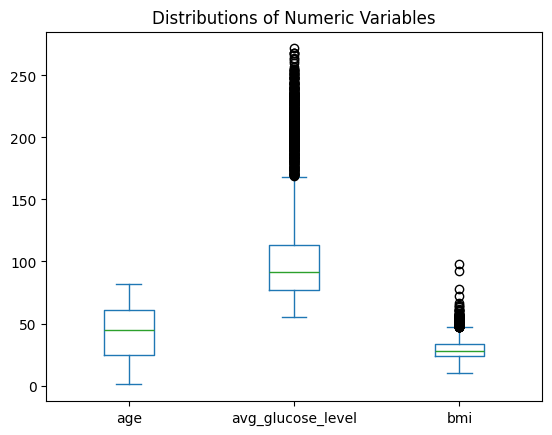

In [888]:
df.plot(kind='box')
plt.title("Distributions of Numeric Variables")
plt.show()

### note: outliers will be ignored

## Correlation between numeric variables

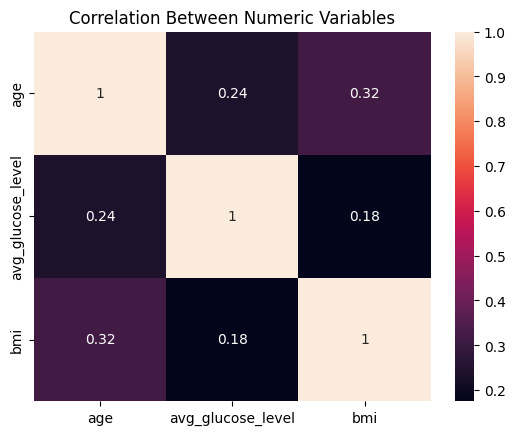

In [889]:
# correlation
numerical_cols = df.select_dtypes(include='number')

sns.heatmap(numerical_cols.corr(), annot=True)
plt.title("Correlation Between Numeric Variables")
plt.show()

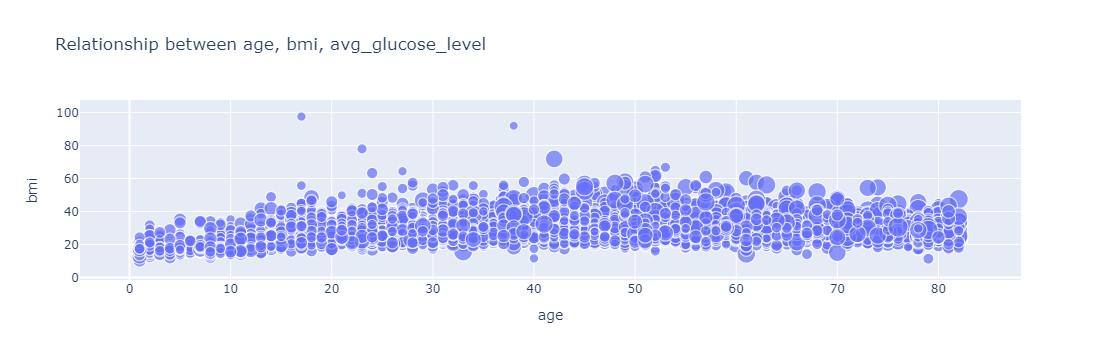

In [890]:
# Relationships
fig = px.scatter(df, x= "age", y= "bmi", size= "avg_glucose_level",
                 title= "Relationship between age, bmi, avg_glucose_level")
fig.show()

## Deep look at age

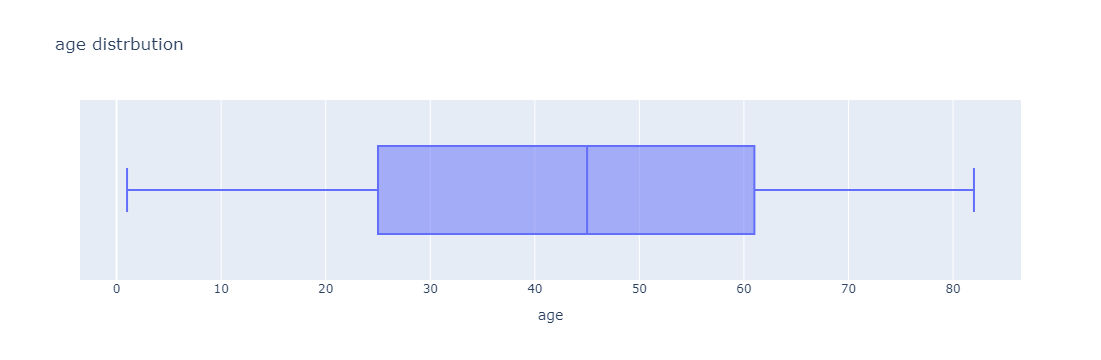

In [891]:
fig = px.box(df, x= "age", title="age distrbution")
fig.show()

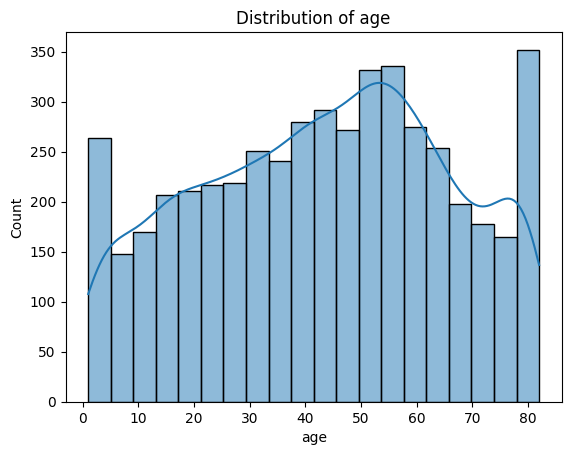

In [892]:
sns.histplot(data= df, x="age", bins=20, kde=True)
plt.title("Distribution of age")
plt.show()

In [893]:
# confirm the type of distribution by numbers
skewness = stats.skew(df["age"])
print(f"skewness: {skewness}")

kurtosis = stats.kurtosis(df["age"])
print(f"kurtosis: {kurtosis}")

median = df["age"].median()
print(f"median: {median}")

mean = df["age"].mean()
print(f"mean: {mean}")

skewness: -0.11579415960882947
kurtosis: -0.9808535002291539
median: 45.0
mean: 43.26737967914438


* The distribution type with a skewness of -0.1157 (negative) and a kurtosis of -0.9808 (negative) is likely to be **slightly negatively skewed and platykurtic.**

## Stroke among different age groups

In [894]:
# Percentages of Stroke among different age groups
stroke_by_age = df.groupby("age_binned", observed=False)["stroke"].value_counts(normalize= True)
stroke_by_age = stroke_by_age.mul(100)
stroke_by_age = stroke_by_age.rename("percentage")

stroke_by_age

age_binned  stroke
1-20        0         99.895068
            1          0.104932
21-40       0         99.577703
            1          0.422297
41-60       0         96.220159
            1          3.779841
61-80       0         88.838475
            1         11.161525
80+         0         80.000000
            1         20.000000
Name: percentage, dtype: float64

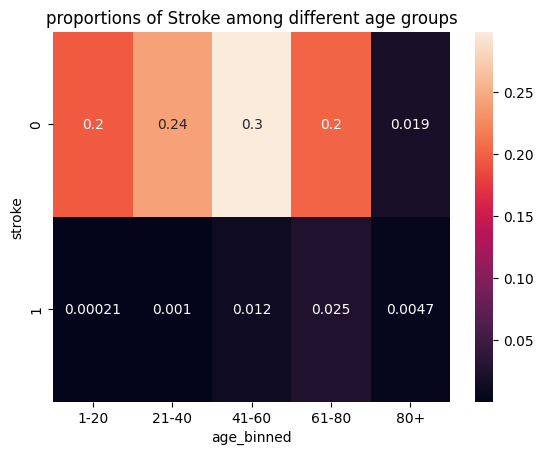

In [895]:
sns.heatmap(pd.crosstab(index=df.stroke, columns=df.age_binned, normalize=True), annot=True)
plt.title('proportions of Stroke among different age groups')
plt.show()

## Stroke among gender

In [896]:
# Percentages of Stroke among gender
stroke_by_gender = df.groupby(by= ["gender"], observed=False)["stroke"].value_counts(normalize= True)
stroke_by_gender = stroke_by_gender.mul(100)
stroke_by_gender = stroke_by_gender.rename("precentege")

stroke_by_gender

gender  stroke
Female  0          95.834780
        1           4.165220
Male    0          95.505051
        1           4.494949
Other   0         100.000000
        1           0.000000
Name: precentege, dtype: float64

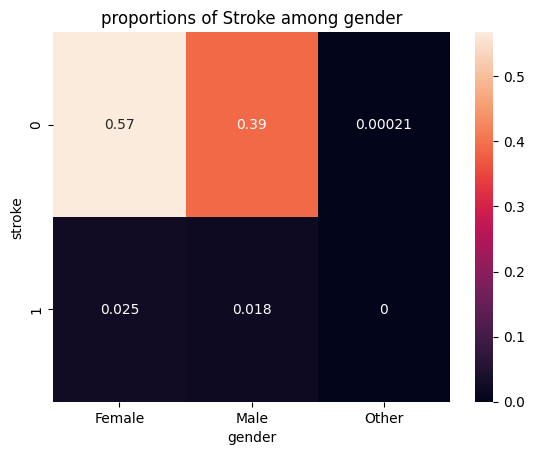

In [897]:
sns.heatmap(pd.crosstab(index=df.stroke, columns=df.gender, normalize=True), annot=True)
plt.title('proportions of Stroke among gender')
plt.show()

## Stroke among smokers and non smokers

In [898]:
# Percentages
stroke_by_smoke = df.groupby(by= ["smoking_status"], observed=False)["stroke"].value_counts(normalize= True)
stroke_by_smoke = stroke_by_smoke.mul(100)
stroke_by_smoke = stroke_by_smoke.rename("precentege")

stroke_by_smoke

smoking_status   stroke
Unknown          0         97.980501
                 1          2.019499
formerly smoked  0         93.189964
                 1          6.810036
never smoked     0         95.464363
                 1          4.535637
smokes           0         94.708277
                 1          5.291723
Name: precentege, dtype: float64

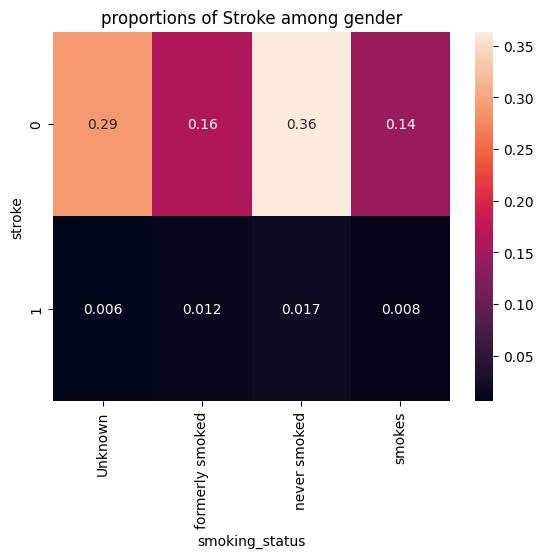

In [899]:
sns.heatmap(pd.crosstab(index=df.stroke, columns=df.smoking_status, normalize=True), annot=True)
plt.title('proportions of Stroke among gender')
plt.show()

## Stroke among different Residence type

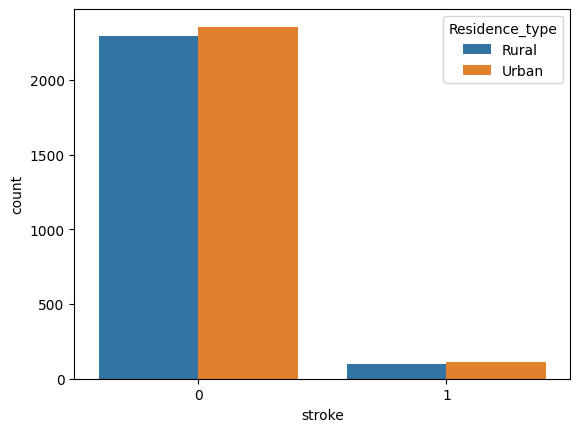

In [900]:
sns.countplot(x= "stroke", hue= "Residence_type", data= df)
plt.show()

## BMI distribution by work type

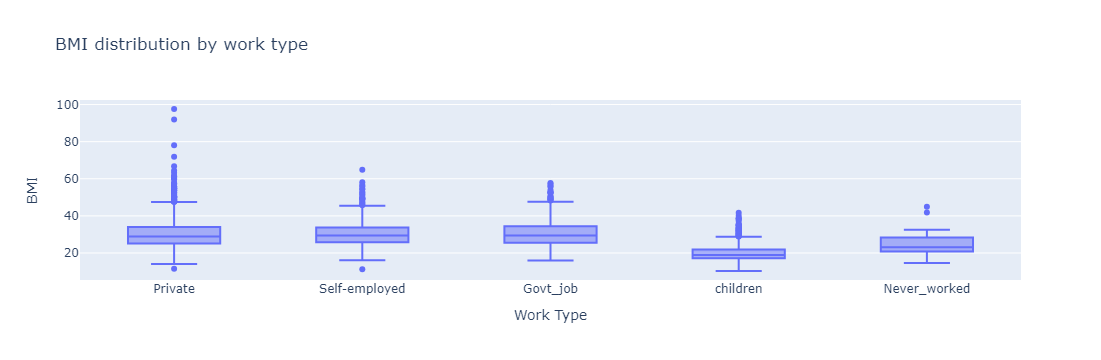

In [902]:
fig = px.box(df, x= "work_type", y= "bmi", title="BMI distribution by work type",
             labels= {"bmi": "BMI", "work_type": "Work Type"})
fig.show()

## KEY FINDINGS

- There is a weak positive correlation between age and BMI.
- The highest percentage (30%) of patients without stroke is among the 41-60 age group.
- The highest percentage (2.5%) of patients with stroke is in females.
- There is almost no difference between rural and urban areas in terms of the incidence of stroke.
* Children have the lowest BMI median (18.95), while self-employed and government jobs have the highest BMI median (29.4).